In [1]:
# Defining a function to export in a format that is compatable with Latex
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

# set_size(width)[0] # width 
# set_size(width)[1] # height 

In [2]:
import pandas as pd
import pyreadstat
import numpy as np
import os
os.getcwd()  # to see the current path of working directory
os.chdir(os.getcwd()  )  # set the current working directory 
pd.set_option('display.max_columns', 20)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# Data 

In [3]:
# Import data for exploration
data = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_data_for_exploration.csv")

# Import the file with the mapping of variable and question
map_variables = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_mapping.csv")

# Create the target variables
data['return'] = np.NaN 
data.loc[data['q27'] <= 2, 'return'] = '1'
data.loc[data['q27'] >= 3, 'return'] = '0'

# Colours 

In [4]:
# help(sns.catplot)

In [5]:
import seaborn as sns
pal = sns.color_palette("rocket_r")
display(pal.as_hex())
pal_codes = sns.color_palette("rocket_r").as_hex()
print(pal_codes)

['#f6b48f', '#f37651', '#e13342', '#ad1759', '#701f57', '#35193e']

['#f6b48f', '#f37651', '#e13342', '#ad1759', '#701f57', '#35193e']


In [6]:
pal = sns.color_palette("Reds")
display(pal.as_hex())
pal_codes = sns.color_palette("Reds").as_hex()
print(pal_codes)

['#fedbcc', '#fcaf93', '#fc8161', '#f44f39', '#d52221', '#aa1016']

['#fedbcc', '#fcaf93', '#fc8161', '#f44f39', '#d52221', '#aa1016']


# Education 

In [7]:
#data.columns.to_list()
data_edu = pd.read_csv("Appendix_MariyaHristova_11250_Feb2023_data_clean.csv")

df_grouped = data_edu[["education", "return"]].groupby([ 'return','education']).count().unstack()

df_grouped = data_edu[["education", "return"]].groupby([ 'education']).count().unstack()
df_grouped_0 = data_edu[data_edu["return"]== 0][["education", "return"]].groupby([ 'education']).count().unstack()
df_grouped_1 = data_edu[data_edu["return"]== 1][["education", "return"]].groupby([ 'education']).count().unstack()

## Bar plot

### Count

In [8]:
df_grouped_1

        education
return  3.0           2
        4.0          66
        5.0          70
        6.0          66
        7.0          18
dtype: int64

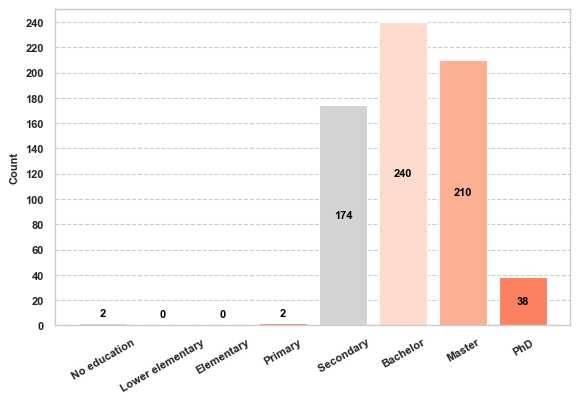

In [9]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
count_no = (2,0,0, 2, 174, 240, 210, 38) ### Corect values 

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

# old bright ones 
#colors = ['#701f57','#701f57','#701f57','#701f57', 
      #    '#ad1759', '#e13342','#f37651','#f6b48f']

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651']
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161']

p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

plt.ylabel('Count', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("No education", 'Lower elementary', 'Elementary', 
                 'Primary', ' Secondary', "Bachelor", "Master" ,"PhD"), fontsize = 8) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 241, 20), fontsize = 8) # y ticks
plt.ylim(0, 250) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 3:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 6, "%.0f" % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , "%.0f" % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=30)
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
plt.savefig('education_count_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

### Percentage 

In [10]:
data_grouped = pd.DataFrame(data_edu["education"].value_counts(normalize=True)*100)
data_grouped.reset_index(inplace = True)
data_grouped = round(data_grouped, 1)


data_grouped = data_grouped.sort_values(by = 'index', ascending = True)
print(data_grouped.education.to_list())
data_grouped

[0.3, 0.3, 26.1, 36.0, 31.5, 5.7]


,index,education
4,0.0,0.3
5,3.0,0.3
2,4.0,26.1
0,5.0,36.0
1,6.0,31.5
3,7.0,5.7


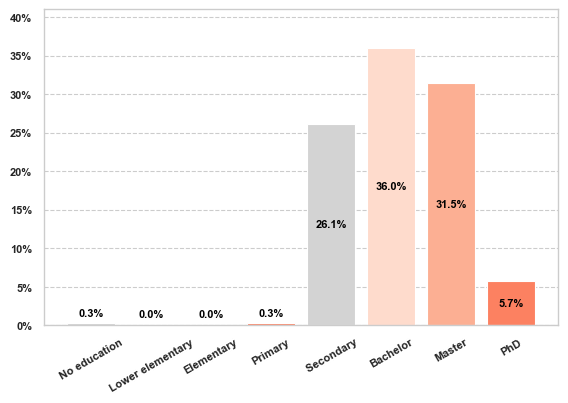

In [11]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = 8 #len(df_grouped)  + 2

count_no =  (0.3, 0, 0, 0.3, 26.1, 36.0, 31.5, 5.7)

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651'] # bright ones
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161']
p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("No education", 'Lower elementary', 'Elementary', 
                 'Primary', ' Secondary', "Bachelor", "Master" ,"PhD"), fontsize = 8) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 41, 5), fontsize = 8) # y ticks
plt.ylim(0, 41) # sets the y axis limits
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=30)
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('education_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

## Stacked bar plot

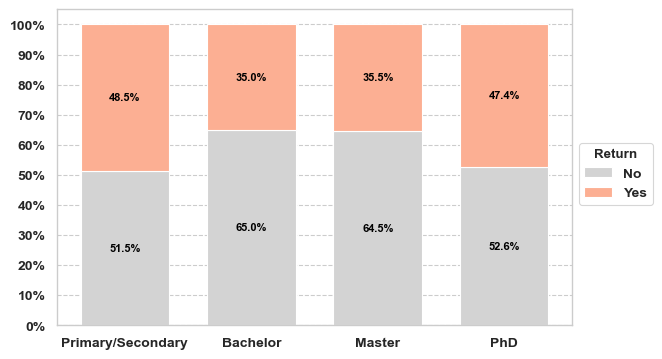

In [12]:
# Stacked barplot for education categories and return 
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 
colors = ['lightgrey', '#fc8161'] # yes is bright orange
colors = ['lightgrey', '#fcaf93']  # yes is light orange
#plt.figure(figsize=(20,10)) 

######################################### PLOT ################################################
# note that the no education group has not answered the return question 
# merged the primary and secondary category, because the primary is 0, we can not dicide by zero, lol 

df_grouped_0_list = pd.Series([0,0,0, 0, 70,  130, 120, 20])
df_grouped_1_list = pd.Series([0,0,0, 2, 66,  70,  66,  18])
df_grouped_list =   pd.Series([0,0,0, 2, 136, 200, 186, 38])

N = len(df_grouped_list) - 4
count_no_0 = (df_grouped_0_list[4:9]/df_grouped_list[4:9]*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1_list[4:9]/df_grouped_list[4:9]*100).tolist()

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.7   # the width of the bars: can also be len(x) sequence
#'#f47e7a', '#b71f5c'

p1 = plt.bar(ind, count_no_0, color= colors[0], width = bar_width )  # bottom # ['#f47e7a']
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = colors[1], width = bar_width)  #['#b71f5c']

#plt.ylabel('Percentage', fontsize = 10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.title('Percentage of people who would return or not grouped by education category in BG or abroad', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ( 'Primary/Secondary', "Bachelor", "Master" ,"PhD"), fontsize = 10) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 101, 10), fontsize = 10) # y ticks
plt.ylim(0, 105) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ( '0 - No', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1
plt.legend((p1[0], p2[0]), ('No ', 'Yes'), fontsize = 10,   ncol= 1,  bbox_to_anchor= (1.0, 0.60), title = "Return")
          # loc = 'best', bbox_to_anchor= (0.65, -0.15), ncol= 2) # below the plot 
# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=8) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=8) # fontweight="bold"


#plt.xticks(rotation=-45)
#plt.savefig('income_return_stacked_barplot_perc.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('income_return_stacked_barplot_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

# Target

## Count

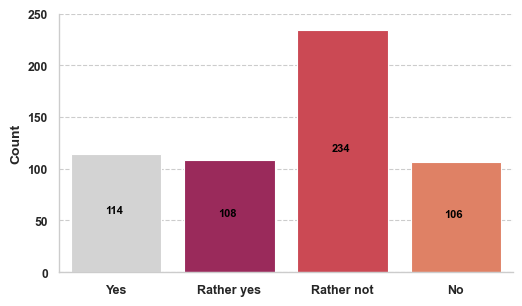

In [13]:
from  matplotlib.ticker import PercentFormatter
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
#fig, ax = plt.subplots(1, 1, figsize=set_size(width))
#ax.yaxis.grid(True) 
#ax.xaxis.grid(False) 
#plt.figure(figsize=(30,15))  # 30, 15

######################## COLORS ##################

# Create an array with the colors you want to use

colors = ['lightgrey', '#ad1759', '#e13342', '#f37651']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

######################################### PLOT ################################################

g = sns.catplot(x="q27", kind="count",  data=data, height = set_size(width, fraction=fraction_scale)[1], 
                aspect = set_size(width, fraction=fraction_scale)[0]/ set_size(width, fraction=fraction_scale)[1] )
#g.fig.suptitle("Would you return to live in Bulgaria? (q27)",x = 0.5, y =1.06, fontsize = 14) 
g.set_axis_labels("" ,"Count", fontsize=10)
g.set_xticklabels(["Yes", "Rather yes", "Rather not" ,"No"], fontsize=9, rotation = 0)
#plt.xticks(rotation=45)
plt.ylim(0, 250) 

    
# Adding the values over the bars
ax = g.facet_axis(0,0)
for p in ax.patches:
    ax.text(p.get_x() + 0.3 , 
            p.get_height() * 0.50, 
           '{0:.0f}'.format(p.get_height()), 
            color='black', 
            rotation='horizontal', 
             fontsize=8) #size='large',
#plt.figure(figsize=(40,10)) 
#plt.tight_layout()
#plt.savefig('barplot_q27.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('barplot_q27_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

#possible answers: 1- Yes, 2- Rather yes, 3 - Rather not, 4 - No.#

## Percentage 

In [14]:
# round(data['q27'].value_counts(normalize=True).mul(100).rename('percent').reset_index()['percent'],1).to_list()

In [15]:
data_grouped = pd.DataFrame(data["q27"].value_counts(normalize=True)*100)
data_grouped.reset_index(inplace = True)
data_grouped = round(data_grouped, 1)

#data_grouped.q27.to_list()
data_grouped = data_grouped.sort_values(by = 'index', ascending = True)
data_grouped

,index,q27
1,1.0,20.3
2,2.0,19.2
0,3.0,41.6
3,4.0,18.9


In [16]:
data_grouped.q27.to_list()

[20.3, 19.2, 41.6, 18.9]

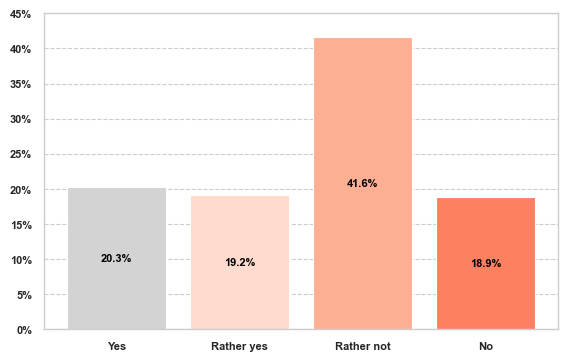

In [17]:
######################################### GRIDS ################################################
# Make everything bold 
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")
from  matplotlib.ticker import PercentFormatter
#ax.grid(False)
colors = ['lightgrey', '#ad1759', '#e13342', '#f37651']
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161']
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 

#plt.figure(figsize=(20,10)) 
N = 4
#count_no = (0,0,0, 2, 136, 200, 186, 38)
#count_no = (2,0,0, 2, 174, 240, 210, 38) ### Corect values 
count_no  = (20.3, 19.2, 41.6, 18.9)

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no, color=colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ("Yes", "Rather yes", "Rather not" ,"No"), fontsize = 8) # removed "Master's degree" --> no observations

plt.yticks(np.arange(0, 46, 5), fontsize = 8) # y ticks
plt.ylim(0, 45) # sets the y axis limits
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 3:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 6, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8) #, fontweight="bold"
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8) #, fontweight="bold"
        
plt.xticks(rotation=0)

#ax = df['myvar'].plot(kind='bar')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('barplot_q27_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

# Gender 

https://github.com/jukuznets/jupyter-notebooks/blob/main/mpl-stacked.ipynb

In [18]:
#### PREPAE THE DATA FOR STACKED BATRPLOT ###########

data_to_plot = pd.crosstab(data['return'], data['q4']).reset_index().drop('return', axis = 1)

data_to_plot.columns = ["Female", "Male"]
data_to_plot.index.names = ['Return']
data_to_plot.rename(index={0: 'No', 1: 'Yes'}, inplace = True)
display(data_to_plot)

data_to_plot_perc = (data_to_plot.div(data_to_plot.sum(axis=1), axis=0)*100).T
display(data_to_plot_perc)

,Female,Male
Return,,
No,212,128
Yes,126,96


Return,No,Yes
Female,62.352941,56.756757
Male,37.647059,43.243243


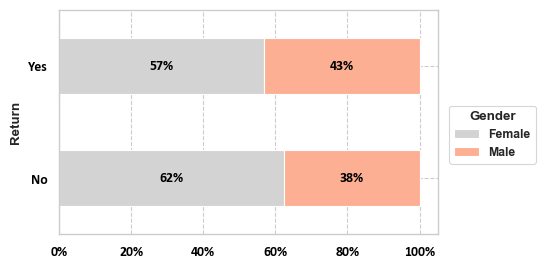

In [19]:
font_color = '#525252'
csfont = {'fontname':'Georgia'} # title font
hfont = {'fontname':'Calibri'} # main font
#colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']
#colors = ['lightgrey', '#ad1759'] #ad1759 #fc8161
#colors = ['#ad1759', 'lightgrey']  # female is red
colors = ['lightgrey', '#fc8161']  # female is bright orange
colors = ['lightgrey', '#fcaf93']  # female is light orange

######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")
#ax.grid(False)
######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
#fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 
#plt.figure(figsize=(30,15))  # 30, 15
############ PLOT 
ax = data_to_plot_perc.T.iloc[:, ].plot.barh(align='center', stacked=True, 
                                             figsize=set_size(width,fraction_scale) , 
                                             color=colors)
#ax = data['ret'].iloc['q4', data['return'], data['q4']))

plt.tight_layout()

# title = plt.title('Target variable by gender', pad=60, fontsize=18, color=font_color, **csfont)
# title.set_position([.5, 1.02])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)
    
plt.xticks(color='black', **hfont)
plt.yticks(color='black', **hfont)

#plt.set_xticklabels(np.arange(0, 101, 10), fontsize=9, rotation = 0)

# ax.legend((p1[0], p2[0]), ('Male', 'Female'), fontsize = 8, loc = 'right', 
#            ncol= 1,  bbox_to_anchor= (1.25, 0.50), title = "Gender")

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles=(handles[0],handles[1]), labels=(labels[0],labels[1]))

ax.legend(  ncol= 1,  bbox_to_anchor= (1.275, 0.60), title = "Gender")
#plt.xlabel('Percentage', fontsize = 9)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
# Annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            "{:.0%}".format(width/100), 
            horizontalalignment='center', 
            verticalalignment='center',
            color='black',
            fontsize=10,
            **hfont)

plt.subplots_adjust(top=0.8, left=0.26)

# #plt.savefig('gender_return_intention.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('gender_return_intention_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

# Age 

In [20]:
# pd.crosstab(data['return'], data['q5']).reset_index().drop('return', axis = 1).T.sort_index()

#data['q5_age_'].value_counts()

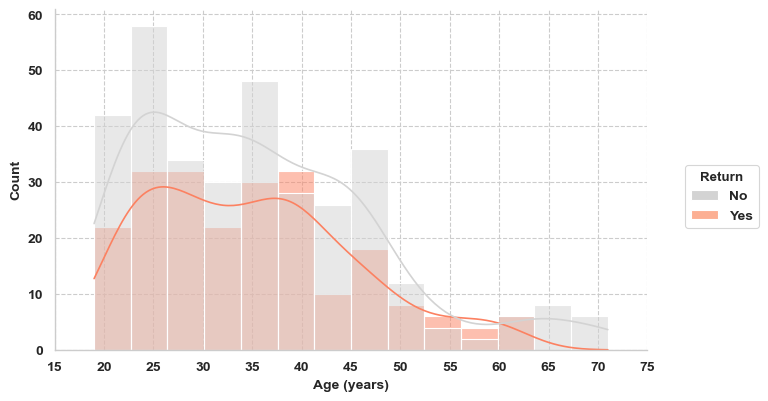

In [21]:
#data["q5"] # age
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")
colors = ['#ad1759', 'lightgrey'] 
colors = ['lightgrey', '#fc8161'] 

 #['lightgrey', '#fedbcc', '#fcaf93', '#fc8161']  # #ad1759 bordo
#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 1
#fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 

######################################### PLOT  ################################################
# g = sns.displot(data, x="q5",  col="return", color = "#ffe577")
# g.fig.suptitle("Age distribution",x = 0.5, y =1.06, fontsize = 14) 
# g.set_axis_labels("" ,"Count", fontsize=12)
#plt.figure(figsize=(5,10))

 
g = sns.displot(data=data, x="q5", hue='return', kde=True,  fill = True,  palette= colors, legend=False, 
               height = set_size(width, fraction=fraction_scale)[1], 
                aspect = set_size(width, fraction=fraction_scale)[0]/ set_size(width, fraction=fraction_scale)[1] )
g.set_axis_labels("Age (years)" ,"Count", fontsize=10)
# 0: lower distribution

#g.fig.set_dpi(600)
#plt.legend(('0 - No ', '1 - Yes'), fontsize = 14,  bbox_to_anchor=(1.4, 0.16))

#plt.legend((p1[0], p2[0]), ( '0 - No ', '1 - Yes'), fontsize = 24,  bbox_to_anchor=(1, -0.13)) #   bbox_to_anchor=(1, 0.1) # ,loc=1
plt.legend((p1[0], p2[0]), ('No ', 'Yes'), fontsize = 10,
           loc = 'right', ncol= 1,  bbox_to_anchor=(1.2, 0.45), title = "Return")  # corner (1.02, 0.87)

           # loc = 'best', bbox_to_anchor= (0.7, -0.2), ncol= 2)  #   bbox_to_anchor=(1, 0.1) # ,loc=1 # bbox_to_anchor = (1, 0.14)

plt.xticks(np.arange(15, 76, 5),  fontsize = 10) # x tick
plt.yticks(np.arange(0, 61, 10),  fontsize = 10) # y tick
#plt.savefig('age_distribution_new.png', bbox_inches='tight',  dpi=600) 
plt.savefig('age_distribution_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

# Income 

In [22]:
# data[["q18_rec", "return"]]

In [23]:
df_grouped = data_edu[["q18_rec", "return"]].groupby([ 'return','q18_rec']).count().unstack()
df_grouped = data_edu[["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()
df_grouped_0 = data_edu[data_edu["return"]== 0][["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()
df_grouped_1 = data_edu[data_edu["return"]== 1][["q18_rec", "return"]].groupby([ 'q18_rec']).count().unstack()

# print(df_grouped_0/df_grouped*100)
# print(df_grouped_1/df_grouped*100)

In [24]:
print("No return count" , df_grouped_0)
print()
print("Yes return count", df_grouped_1)

No return count         q18_rec
return  0.0        10
        1.0        36
        2.0        56
        3.0        66
        4.0        50
        5.0        28
        6.0        10
        7.0        62
dtype: int64

Yes return count         q18_rec
return  0.0        16
        1.0        30
        2.0        46
        3.0        38
        4.0        26
        5.0        12
        6.0         8
        7.0        34
dtype: int64


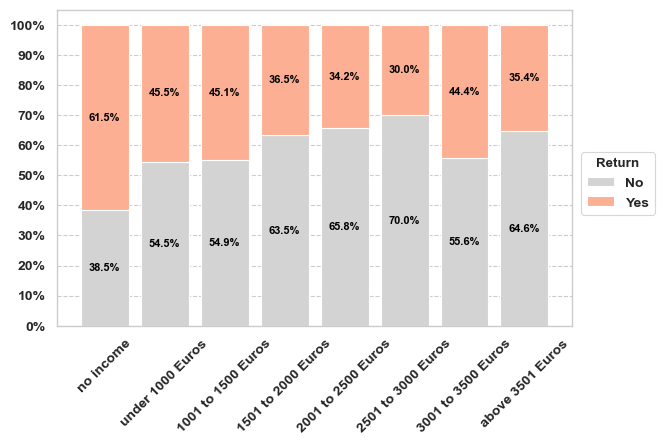

In [25]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")
colors = ['lightgrey', '#fc8161'] # bright orange yes
colors = ['lightgrey', '#fcaf93']  # yes is light orange
#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 
#plt.figure(figsize=(40,20)) 

######################################### PLOT ################################################

N = len(df_grouped)
count_no_0 = (df_grouped_0/df_grouped*100).tolist()  # when devided shows the percentage 
count_yes_1 = (df_grouped_1/df_grouped*100).tolist()

ind = np.arange(N)    # the x locations for the groups
width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_no_0, color=colors[0], width = width , label = ["0 - No"])  # bottom # ['#ad1759'] 
p2 = plt.bar(ind, count_yes_1,
             bottom=count_no_0, color = colors[1], width = width, label = ["1 - Yes"]) # ['#f47e7a']

#plt.ylabel('Percentage', fontsize = 10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.title('Percentage of people who would return or not grouped by income category (in Euros)', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('no income' , 'under 1000 Euros', '1001 to 1500 Euros', 
                 '1501 to 2000 Euros', '2001 to 2500 Euros', 
                 '2501 to 3000 Euros', '3001 to 3500 Euros', 
                 'above 3501 Euros'), fontsize = 10)

plt.yticks(np.arange(0, 101, 10), fontsize = 10) # y ticks
plt.ylim(0, 105) # sets the y axis limits

plt.legend((p1[0], p2[0]), ('No ', 'Yes'), title = "Return",
           fontsize = 10, loc = 'right', 
            ncol= 1,  bbox_to_anchor= (1.175, 0.45))
           #loc = 'best', bbox_to_anchor= (0.65, 1.15), ncol= 2)  #   bbox_to_anchor=(1, 0.1) # ,loc=1 # bbox_to_anchor = (1, 0.14)

# Showing the values
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=8) #"%.1f" 2 decimal digiits no % sign  
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., '%.1f%%' % h2, ha="center", va="center", color="black", fontsize=8) # fontweight="bold"
    
plt.xticks(rotation=45)

#plt.savefig('income_return_stacked_barplot.pdf', bbox_inches='tight',  dpi=600) 
#plt.savefig('income_return_stacked_barplot_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

# Destination countries

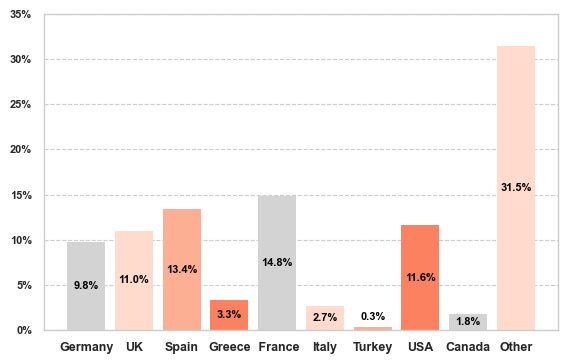

In [26]:
### Countries

import numpy as np
import matplotlib.pyplot as plt

######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 
#plt.figure(figsize=(30,15))  # 30, 15
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 
         'lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 
         'lightgrey', '#fedbcc']
######################################### PLOT ################################################
 
N = 10  # number of x points
count_no = (66,74,90, 22, 100, 18, 2, 78, 12, 212)
count_perc = (9.8, 11.0, 13.4, 3.3, 14.8, 2.7, 0.3, 11.6, 1.8, 31.5)
ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8    # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, count_perc, color= colors, width = bar_width, edgecolor='none' ) # edgecolor is the box borders color

# old colors
# ['lightgrey', '#ad1759', '#e13342', '#f37651', '#f6b48f', 'lightgrey', '#ad1759', '#e13342', '#f37651', '#f6b48f']
#################################### LABELS AND TICKS ######################################

#plt.ylabel('Percentage', fontsize = 9)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

plt.xticks(ind, ("Germany", 'UK', 'Spain', 
                 'Greece', ' France', "Italy", "Turkey" ,"USA", "Canada", 'Other'), fontsize = 9) 

plt.yticks(np.arange(0, 36, 5), fontsize = 8) # y ticks
plt.ylim(0, 35) 

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 1.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center", color="black", fontsize=8, fontweight="bold")
    
#plt.xticks(rotation=-45)

#################################### SAVE ######################################

#plt.savefig('countries_bar_plot_perc.png', bbox_inches='tight',  dpi=600) # old one 
#plt.savefig('countries_bar_plot_perc_new.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('countries_bar_plot_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()

In [27]:
# Ethnicity: 
print(data_edu.q33_roma.sum())
print(data_edu.q33_bulgarian.sum())
print(data_edu.q33_turkish.sum())
print(data_edu.q33_other.sum())

4
530
12
10


# Conditions to return 

In [28]:
reasons = ['q28_1', 
'q28_2',
'q28_3',
'q28_4',
'q28_5',
'q28_6',
'q28_7',
'q28_8',
'q28_9',
'q28_10']

for i in reasons: 
    #print(i)
    print(round(data[i].sum()/2082*100,2), ",")
    

13.93 ,
4.8 ,
1.63 ,
8.55 ,
2.11 ,
10.28 ,
7.01 ,
11.53 ,
7.49 ,
32.66 ,


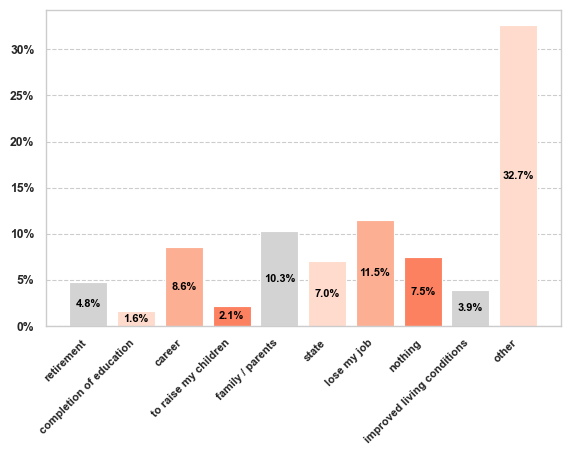

In [29]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = 10 #len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
#count_no = (2,   0, 0, 2,   174,  240,  210,  38) ### Corect values 
#count_no =  (0.3, 0, 0, 0.3, 26.1, 36.0, 31.5, 5.7)
count_no = (
4.8 ,
1.63 ,
8.55 ,
2.11 ,
10.28 ,
7.01 ,
11.53 ,
7.49 , 3.93 ,
32.66 )

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

# old bright ones 
#colors = ['#701f57','#701f57','#701f57','#701f57', 
      #    '#ad1759', '#e13342','#f37651','#f6b48f']

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651'] # bright ones
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc',]
p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, (
'retirement',
'completion of education',
'career',
'to raise my children',
'family / parents',
'state',
'lose my job',
'nothing', 'improved living conditions',
    'other'), fontsize = 8) # removed "Master's degree" --> no observations



#plt.yticks(np.arange(0, 41, 5), fontsize = 8) # y ticks
#plt.ylim(0, 41) # sets the y axis limits
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=45, ha = 'right')
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('reaasons_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()######################################### GRIDS ################################################


# Initial departure: 

In [30]:
# Initial departure: 
round(data.q9.value_counts(normalize = True)*100,2)

education       36.25
job             25.94
family          19.69
other           10.94
temp_job         3.44
green_card       3.44
citiz_Canada     0.31
Name: q9, dtype: float64

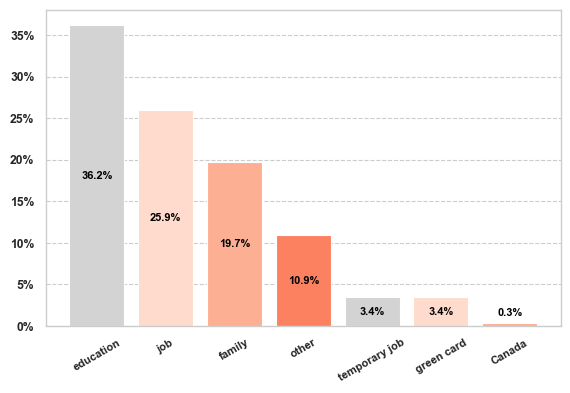

In [31]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = 7 #len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
#count_no = (2,   0, 0, 2,   174,  240,  210,  38) ### Corect values 
#count_no =  (0.3, 0, 0, 0.3, 26.1, 36.0, 31.5, 5.7)
count_no = (36.25, 25.94, 19.69, 10.94, 3.44, 3.44, 0.31)

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

# old bright ones 
#colors = ['#701f57','#701f57','#701f57','#701f57', 
      #    '#ad1759', '#e13342','#f37651','#f6b48f']

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651'] # bright ones
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc',]
p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('education',
'job',
'family',
'other',
'temporary job',
'green card',
'Canada'), fontsize = 8) # removed "Master's degree" --> no observations



#plt.yticks(np.arange(0, 41, 5), fontsize = 8) # y ticks
#plt.ylim(0, 41) # sets the y axis limits
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=30, ha = 'center')
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
plt.savefig('initial_departure_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()######################################### GRIDS ################################################


# Occupation

In [32]:
round(data.q49.value_counts(normalize = True)*100)
#31.0, 21.0, 19.0, 9.0, 5.0, 4.0, 4.0, 3.0, 2.0
#data.q49.unique()

['employee','worker', 'student', 'owner','freelancer',  'housewife/husband'
       'other'   , 'unemployed', 'retired']

['employee',
 'worker',
 'student',
 'owner',
 'freelancer',
 'housewife/husbandother',
 'unemployed',
 'retired']

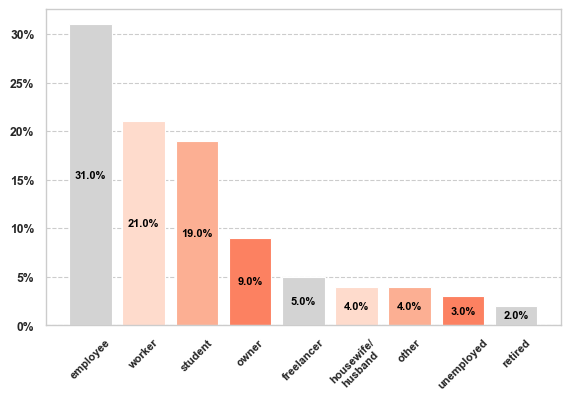

In [33]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = 9 #len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
#count_no = (2,   0, 0, 2,   174,  240,  210,  38) ### Corect values 
#count_no =  (0.3, 0, 0, 0.3, 26.1, 36.0, 31.5, 5.7)
count_no = (31.0, 21.0, 19.0, 9.0, 5.0, 4.0, 4.0, 3.0, 2.0)

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

# old bright ones 
#colors = ['#701f57','#701f57','#701f57','#701f57', 
      #    '#ad1759', '#e13342','#f37651','#f6b48f']

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651'] # bright ones
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc',]
p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('employee','worker', 'student', 'owner','freelancer', 'housewife/\nhusband',
       'other'   , 'unemployed', 'retired'), fontsize = 8) # removed "Master's degree" --> no observations



#plt.yticks(np.arange(0, 41, 5), fontsize = 8) # y ticks
#plt.ylim(0, 41) # sets the y axis limits
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=45, ha = 'center')
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
plt.savefig('occupation_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()######################################### GRIDS ################################################


# Reasons for host country

In [34]:

reasons_host = ['q16_1',
'q16_2',
'q16_3',
'q16_4',
'q16_5',
'q16_6',
'q16_7',
'q16_8',
'q16_9',
'q16_10',
'q16_11',
'q16_12',
'q16_13',
'q16_14',
'q16_15',
'q16_16',
'q16_17',
'q16_18']

count = []
count_num = []
for i in reasons_host:
    ct = round(data[i].sum()/3702*100,2)
    count.append(ct)
    
    count_n = data[i].sum()
    count_num.append(count_n)
    
count

[8.7,
 6.43,
 8.32,
 7.13,
 6.16,
 5.78,
 1.89,
 4.21,
 9.24,
 7.46,
 7.35,
 8.59,
 5.19,
 4.32,
 3.78,
 0.38,
 2.27,
 2.81]

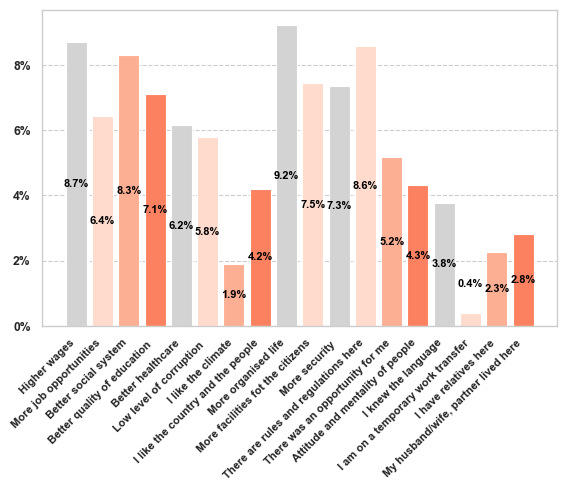

In [35]:
######################################### GRIDS ################################################
# Make everything bold 
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold" 
sns.set_style("whitegrid", {'grid.linestyle': '--'})
sns.set_context("paper")

#ax.grid(False)

######################################### SIZE ################################################
width = 480
fraction_scale = 0.8
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
ax.yaxis.grid(True) 
ax.xaxis.grid(False) 


#plt.figure(figsize=(20,10)) 

N = 18 #len(df_grouped)  + 2
#count_no = (0,0,0, 2, 136, 200, 186, 38)
#count_no = (2,   0, 0, 2,   174,  240,  210,  38) ### Corect values 
#count_no =  (0.3, 0, 0, 0.3, 26.1, 36.0, 31.5, 5.7)
count_no = (8.7,6.43,8.32,7.13,6.16, 5.78, 1.89, 4.21, 9.24, 7.46, 7.35, 8.59, 5.19, 4.32, 3.78, 0.38, 2.27, 2.81)

ind = np.arange(N)    # the x locations for the groups
bar_width = 0.8   # the width of the bars: can also be len(x) sequence

# old bright ones 
#colors = ['#701f57','#701f57','#701f57','#701f57', 
      #    '#ad1759', '#e13342','#f37651','#f6b48f']

#colors = ['lightgrey', '#ad1759', '#e13342', '#f37651', 'lightgrey', '#ad1759', '#e13342', '#f37651'] # bright ones
colors = ['lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc', '#fcaf93', '#fc8161', 'lightgrey', '#fedbcc',]
p1 = plt.bar(ind, count_no, color= colors, 
             width = bar_width )  # bottom # #ad1759

#plt.ylabel('Percentage', fontsize = 8)
#plt.title('Count of people who would return or not grouped by education category', fontsize = 24, x = 0.5, y =1.03) # title position 

plt.xticks(ind, ('Higher wages',
'More job opportunities',
'Better social system',
'Better quality of education ',
'Better healthcare',
'Low level of corruption ',
'I like the climate',
'I like the country and the people',
'More organised life',
'More facilities fot the citizens',
'More security ',
'There are rules and regulations here',
'There was an opportunity for me',
'Attitude and mentality of people',
'I knew the language',
'I am on a temporary work transfer',
'I have relatives here',
'My husband/wife, partner lived here'), fontsize = 8) # removed "Master's degree" --> no observations



#plt.yticks(np.arange(0, 41, 5), fontsize = 8) # y ticks
#plt.ylim(0, 41) # sets the y axis limits
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#plt.legend((p1[0], p2[0]), ('0 - No ', '1 - Yes'), fontsize = 20,  bbox_to_anchor=(1, 0.09)) #   bbox_to_anchor=(1, 0.1) # ,loc=1

# Showing the values : MH 
for i in p1:
    h1 = i.get_height()
    if h1 < 0.5:
        # If the value is 0, show the value slightly above the x axis
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 + 1, '%.1f%%' % h1, ha="center", color="black", 
                 fontsize=8, fontweight="bold")
    else: 
        # If the values is not 0, show the value in the middle of the bar
        plt.text(i.get_x() + i.get_width() / 2., h1 / 2 , '%.1f%%' % h1, ha="center", va="center",
                 color="black", fontsize=8, fontweight="bold")
        
plt.xticks(rotation=45, ha = 'right')
#plt.savefig('income_return_stacked_barplot_count.png', bbox_inches='tight',  dpi=600) 
#plt.savefig('reasons_host_perc_new.pdf', bbox_inches='tight',  dpi=1200) 
plt.show()######################################### GRIDS ################################################


In [36]:
count_perc = [8.7,6.43, 8.32, 7.13, 6.16, 5.78, 1.89, 4.21, 9.24, 7.46, 7.35, 8.59, 5.19, 4.32, 3.78, 0.38, 2.27, 2.81]
reasons_list = ['Higher wages',
'More job opportunities',
'Better social system',
'Better quality of education ',
'Better healthcare',
'Low level of corruption ',
'I like the climate',
'I like the country and the people',
'More organised life',
'More facilities fot the citizens',
'More security ',
'There are rules and regulations here',
'There was an opportunity for me',
'Attitude and mentality of people',
'I knew the language',
'I am on a temporary work transfer',
'I have relatives here',
'My husband/wife, partner lived here']

dt_latex_reasons_host = pd.DataFrame()
dt_latex_reasons_host['Question']  = reasons_host
dt_latex_reasons_host['Reasons'] = reasons_list
dt_latex_reasons_host['Count'] = count_num
dt_latex_reasons_host['Percentage'] = count_perc
dt_latex_reasons_host = dt_latex_reasons_host.sort_values(by = 'Count', ascending = False)
print(dt_latex_reasons_host.to_latex(index = False))

\begin{tabular}{llrr}
\toprule
Question &                              Reasons &  Count &  Percentage \\
\midrule
   q16\_9 &                  More organised life &  342.0 &        9.24 \\
   q16\_1 &                         Higher wages &  322.0 &        8.70 \\
  q16\_12 & There are rules and regulations here &  318.0 &        8.59 \\
   q16\_3 &                 Better social system &  308.0 &        8.32 \\
  q16\_10 &     More facilities fot the citizens &  276.0 &        7.46 \\
  q16\_11 &                       More security  &  272.0 &        7.35 \\
   q16\_4 &         Better quality of education  &  264.0 &        7.13 \\
   q16\_2 &               More job opportunities &  238.0 &        6.43 \\
   q16\_5 &                    Better healthcare &  228.0 &        6.16 \\
   q16\_6 &             Low level of corruption  &  214.0 &        5.78 \\
  q16\_13 &      There was an opportunity for me &  192.0 &        5.19 \\
  q16\_14 &     Attitude and mentality of people &  160.0 &  

C:\Users\marij\AppData\Local\Temp\ipykernel_12292\3359152797.py:27: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(dt_latex_reasons_host.to_latex(index = False))


In [37]:
print("Ran sucessfully!!!")

Ran sucessfully!!!
